In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Network Model for skin diseases classification/Skin disease/hmnist_28_28_L.csv')

In [ ]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel0745,pixel0746,pixel0747,pixel0748,pixel0749,pixel0750,pixel0751,pixel0752,pixel0753,pixel0754,pixel0755,pixel0756,pixel0757,pixel0758,pixel0759,pixel0760,pixel0761,pixel0762,pixel0763,pixel0764,pixel0765,pixel0766,pixel0767,pixel0768,pixel0769,pixel0770,pixel0771,pixel0772,pixel0773,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,188,190,185,181,188,189,182,180,171,171,178,156,151,157,151,159,167,165,177,176,176,176,179,186,170,182,198,190,196,191,...,179,175,179,186,189,186,153,137,146,164,171,149,167,169,166,171,175,193,198,199,197,185,172,188,199,199,194,191,184,176,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,182,183,180,179,180,179,180,173,167,171,171,171,160,150,126,102,63,46,34,81,124,149,155,135,136,155,167,182,190,191,...,196,184,172,173,155,145,131,113,68,27,16,50,51,74,109,129,141,163,183,179,175,183,183,177,176,179,188,184,185,181,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,175,164,170,171,158,143,144,136,154,167,168,171,165,158,150,147,138,116,163,164,167,156,153,158,167,171,184,190,170,161,...,190,177,163,165,166,166,171,165,154,143,127,151,153,150,165,173,173,177,177,181,182,186,187,189,189,188,184,187,185,162,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,159,176,173,169,156,159,170,164,163,159,164,161,156,144,127,93,57,40,48,97,136,151,148,155,161,169,176,161,151,170,...,166,166,148,148,144,141,125,97,56,20,14,43,47,70,97,128,144,151,157,159,161,167,160,161,163,164,151,161,170,142,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,222,227,233,230,231,230,241,239,244,247,242,238,239,239,233,211,180,144,145,173,187,195,203,210,210,213,224,224,222,230,...,206,214,209,206,182,197,203,205,205,179,131,99,139,177,193,201,206,197,185,201,197,205,210,214,212,215,209,205,207,211,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,215,210,211,204,192,193,196,195,200,198,200,220,220,199,198,203,199,200,194,200,199,203,165,158,184,195,182,176,188,200,...,202,205,214,218,214,215,195,190,200,200,195,194,207,214,215,218,220,207,206,207,210,211,207,206,205,204,205,201,208,210,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,168,179,183,190,172,166,186,183,178,176,174,168,155,141,86,43,36,28,16,72,117,107,118,136,134,139,158,174,178,176,...,195,187,180,180,160,150,160,136,124,61,4,52,111,151,168,175,178,182,198,178,191,194,182,183,189,189,187,173,176,184,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,202,208,218,235,233,236,234,224,220,204,171,178,195,208,208,175,141,116,138,177,179,178,192,205,213,210,214,216,227,212,...,224,229,222,217,199,203,212,210,188,172,174,167,186,189,212,223,225,227,226,230,220,207,221,211,218,213,177,192,219,223,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,160,168,167,164,173,176,177,182,179,174,181,166,176,180,171,164,166,170,132,135,133,145,152,156,159,148,155,161,164,169,...,186,186,182,170,176,183,172,171,179,174,178,135,148,150,155,168,166,164,169,168,161,166,167,163,156,158,157,175,180,178,172,171,175,183,177,170,169,166

In [ ]:
np.sqrt(784)

28.0

# Presrocessing

In [ ]:
data.isna().sum().sum()

0

In [ ]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [ ]:
y.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

#Rescaling

In [ ]:
X = X / 255

X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel0744,pixel0745,pixel0746,pixel0747,pixel0748,pixel0749,pixel0750,pixel0751,pixel0752,pixel0753,pixel0754,pixel0755,pixel0756,pixel0757,pixel0758,pixel0759,pixel0760,pixel0761,pixel0762,pixel0763,pixel0764,pixel0765,pixel0766,pixel0767,pixel0768,pixel0769,pixel0770,pixel0771,pixel0772,pixel0773,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,0.737255,0.745098,0.725490,0.709804,0.737255,0.741176,0.713725,0.705882,0.670588,0.670588,0.698039,0.611765,0.592157,0.615686,0.592157,0.623529,0.654902,0.647059,0.694118,0.690196,0.690196,0.690196,0.701961,0.729412,0.666667,0.713725,0.776471,0.745098,0.768627,0.749020,...,0.752941,0.701961,0.686275,0.701961,0.729412,0.741176,0.729412,0.600000,0.537255,0.572549,0.643137,0.670588,0.584314,0.654902,0.662745,0.650980,0.670588,0.686275,0.756863,0.776471,0.780392,0.772549,0.725490,0.674510,0.737255,0.780392,0.780392,0.760784,0.749020,0.721569,0.690196,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,0.713725,0.717647,0.705882,0.701961,0.705882,0.701961,0.705882,0.678431,0.654902,0.670588,0.670588,0.670588,0.627451,0.588235,0.494118,0.400000,0.247059,0.180392,0.133333,0.317647,0.486275,0.584314,0.607843,0.529412,0.533333,0.607843,0.654902,0.713725,0.745098,0.749020,...,0.749020,0.768627,0.721569,0.674510,0.678431,0.607843,0.568627,0.513725,0.443137,0.266667,0.105882,0.062745,0.196078,0.200000,0.290196,0.427451,0.505882,0.552941,0.639216,0.717647,0.701961,0.686275,0.717647,0.717647,0.694118,0.690196,0.701961,0.737255,0.721569,0.725490,0.709804,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,0.686275,0.643137,0.666667,0.670588,0.619608,0.560784,0.564706,0.533333,0.603922,0.654902,0.658824,0.670588,0.647059,0.619608,0.588235,0.576471,0.541176,0.454902,0.639216,0.643137,0.654902,0.611765,0.600000,0.619608,0.654902,0.670588,0.721569,0.745098,0.666667,0.631373,...,0.749020,0.745098,0.694118,0.639216,0.647059,0.650980,0.650980,0.670588,0.647059,0.603922,0.560784,0.498039,0.592157,0.600000,0.588235,0.647059,0.678431,0.678431,0.694118,0.694118,0.709804,0.713725,0.729412,0.733333,0.741176,0.741176,0.737255,0.721569,0.733333,0.725490,0.635294,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,0.623529,0.690196,0.678431,0.662745,0.611765,0.623529,0.666667,0.643137,0.639216,0.623529,0.643137,0.631373,0.611765,0.564706,0.498039,0.364706,0.223529,0.156863,0.188235,0.380392,0.533333,0.592157,0.580392,0.607843,0.631373,0.662745,0.690196,0.631373,0.592157,0.666667,...,0.603922,0.650980,0.650980,0.580392,0.580392,0.564706,0.552941,0.490196,0.380392,0.219608,0.078431,0.054902,0.168627,0.184314,0.274510,0.380392,0.501961,0.564706,0.592157,0.615686,0.623529,0.631373,0.654902,0.627451,0.631373,0.639216,0.643137,0.592157,0.631373,0.666667,0.556863,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,0.870588,0.890196,0.913725,0.901961,0.905882,0.901961,0.945098,0.937255,0.956863,0.968627,0.949020,0.933333,0.937255,0.937255,0.913725,0.827451,0.705882,0.564706,0.568627,0.678431,0.733333,0.764706,0

#Reshaping

In [ ]:
X = np.array(X)
print(X.shape)

(10015, 784)


In [ ]:
X = X.reshape(-1, 28, 28, 1)
print(X.shape)

(10015, 28, 28, 1)


# Visualizing

In [ ]:
sample_data = pd.Series(list(zip(X, y))).sample(15)

sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

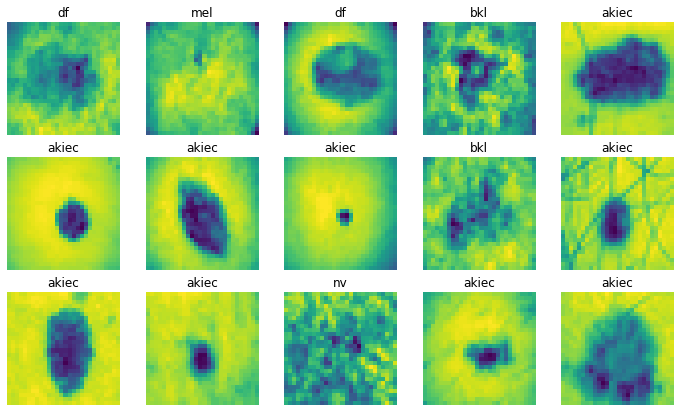

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.squeeze(sample_X[i]))
    img_label = label_mapping[sample_y[i]]
    plt.title(img_label)
    plt.axis("off")

plt.show()

# Splitting for train-test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

#Modeling

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 16)        160       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 64)          18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 1, 1, 64)          0     

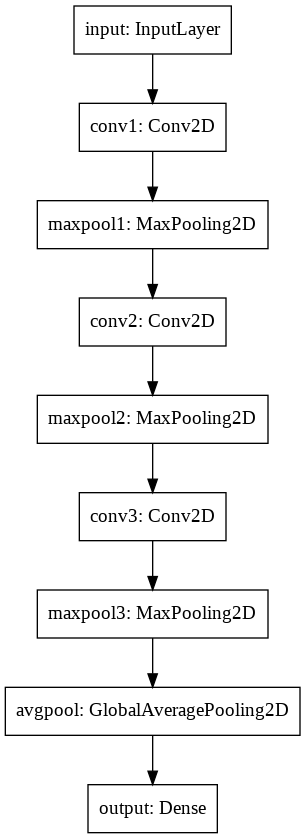

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='input')

conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, name='conv1')(inputs)
maxpool1 = tf.keras.layers.MaxPooling2D(name='maxpool1')(conv1)

conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, name='conv2')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling2D(name='maxpool2')(conv2)

conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, name='conv3')(maxpool2)
maxpool3 = tf.keras.layers.MaxPooling2D(name='maxpool3')(conv3)

avgpool = tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool3)

outputs = tf.keras.layers.Dense(7, activation='softmax', name='output')(avgpool)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

# Training

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
176/176 [==============================] - 4s 19ms/step - loss: 1.1514 - accuracy: 0.6724 - val_loss: 1.1015 - val_accuracy: 0.6583
Epoch 2/50
176/176 [==============================] - 3s 17ms/step - loss: 1.0262 - accuracy: 0.6797 - val_loss: 1.0165 - val_accuracy: 0.6576
Epoch 3/50
176/176 [==============================] - 3s 17ms/step - loss: 0.9673 - accuracy: 0.6769 - val_loss: 0.9891 - val_accuracy: 0.6619
Epoch 4/50
176/176 [==============================] - 3s 18ms/step - loss: 0.9371 - accuracy: 0.6830 - val_loss: 0.9549 - val_accuracy: 0.6641
Epoch 5/50
176/176 [==============================] - 3s 18ms/step - loss: 0.9146 - accuracy: 0.6894 - val_loss: 0.9543 - val_accuracy: 0.6698
Epoch 6/50
176/176 [==============================] - 3s 18ms/step - loss: 0.9045 - accuracy: 0.6920 - val_loss: 0.9332 - val_accuracy: 0.6655
Epoch 7/50
176/176 [==============================] - 3s 18ms/step - loss: 0.8963 - accuracy: 0.6935 - val_loss: 0.9388 - val_accuracy: 0.6690

#Results

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 69.185%


In [ ]:
y_true = np.array(y_test)

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

In [ ]:
y_true

array([0, 4, 4, ..., 4, 4, 4])

In [ ]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

# Confusion Matrix

In [ ]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


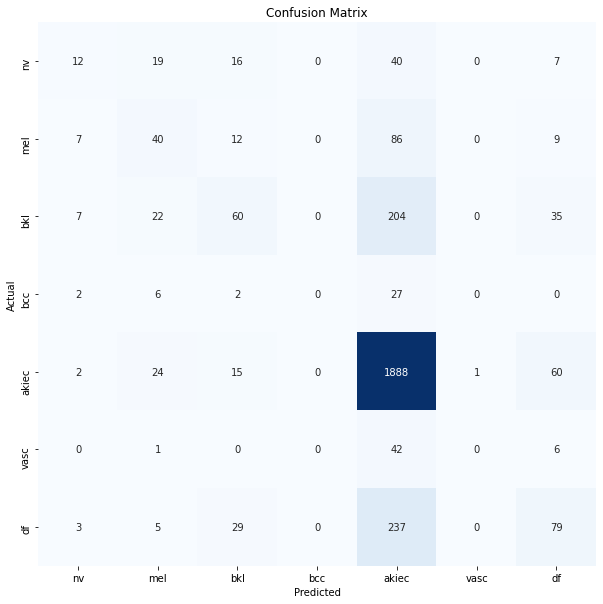

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7) + 0.5, label_mapping.values())
plt.xlabel("Predicted")

plt.yticks(np.arange(7) + 0.5, label_mapping.values())
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [ ]:
print(clr)

              precision    recall  f1-score   support

          nv       0.36      0.13      0.19        94
         mel       0.34      0.26      0.30       154
         bkl       0.45      0.18      0.26       328
         bcc       0.00      0.00      0.00        37
       akiec       0.75      0.95      0.84      1990
        vasc       0.00      0.00      0.00        49
          df       0.40      0.22      0.29       353

    accuracy                           0.69      3005
   macro avg       0.33      0.25      0.27      3005
weighted avg       0.62      0.69      0.64      3005

